The data is already be cleaned and processed last week. I create a new csv file and storge them. So, I will read that file instead.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress   
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Sud uqsetion: What is the probability that the total steps for a week is lower than recommended. As doctors generally consider fewer than 10000 steps per day to be sedentary.

In [3]:
from google.colab import drive
drive.mount('/content/drive') #Link to the Google drive and read the data set later.

Mounted at /content/drive


In [54]:
weeksteps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps_08.csv", sep = ",")

Let x be the target variable and y be the characteristic variable. The target variable is prepared for prediction. The characteristic variable is parpered for check the accurate.

In [55]:
x = weeksteps.drop(columns='Sedentary')
y = weeksteps['Sedentary']

The function train_test_split is for seperating test data set and training data set. x_train and y_train for training, x_test and y_test for testing.

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.6) # I selected 60% of data for testing. Temporarily set random sampling.

Take x_train and y_train variables into logistic regression function.

In [57]:
model = LogisticRegression()
model = model.fit(x_train, y_train)
model

LogisticRegression()

Get the prediced sedentary.

In [58]:
y_prd = model.predict(x_test)
y_prd[:20] # Get the prediction of sedentary.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
a = pd.DataFrame()
a['Predicted'] = list(y_prd)
a['Actual'] = list(y_test)

a.head()

,Predicted,Actual
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


Calculate accuracy of the predicted sedentary value for checking.

In [60]:
acc = model.score(x_test, y_test)
acc

0.5909090909090909

The accuracy is 59.09%.

Predict accuracy.

In [61]:
y_prd_acc = model.predict_proba(x_test)
acc_table = pd.DataFrame(y_prd_acc, columns = ['Probability of not sedentary','Probability of sedentary'])
acc_table

,Probability of not sedentary,Probability of sedentary
0,0.255671,0.744329
1,0.290488,0.709512
2,0.271804,0.728196
3,0.281149,0.718851
4,0.275287,0.724713
5,0.278188,0.721812
6,0.329267,0.670733
7,0.337760,0.662240
8,0.298759,0.701241
9,0.400228,0.599772


Let's viaualise the data.

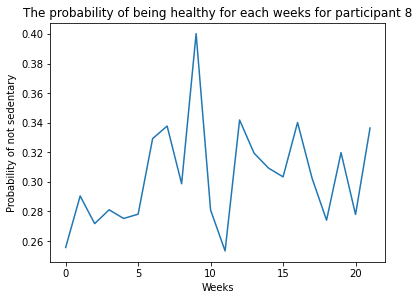

In [66]:
y = acc_table['Probability of not sedentary']
x = [  ]
for n in range(0,len(acc_table)):
  x.append(n)
  n+=1
plt.plot(x,y)
plt.xlabel("Weeks")
plt.ylabel("Probability of not sedentary")
plt.title("The probability of being healthy for each weeks for participant 8")
plt.subplots_adjust(bottom=0.05)

The trend of the probability of not sedentary follows the changing of time and seasons. The data shows a increasing trend and decreasing then. The step count is relatively low at January and increasing until Aprial and June. The weather gets cool at that moment. The participant 8 may more willing to walk more in cool days. That makes the participant less sedentary.

In [ ]:
weeksteps05 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weeks_and_steps_5.csv",sep=',')

In [ ]:
weeksteps05['Week'] = weeksteps05['Week'].astype('int') # Change 
weeksteps05['sedentary'] = weeksteps05['sedentary'].astype('int')

In [ ]:
x05 = weeksteps05.drop(columns='sedentary')
y05 = weeksteps05['sedentary']

In [ ]:
x05_train,x05_test,y05_train,y05_test = train_test_split(x05, y05, test_size = 0.5) # I selected 30% of data for testing. Temporarily do not set random sampling.

In [ ]:
model05 = LogisticRegression()
model05 = model05.fit(x05_train, y05_train)

In [ ]:
Y_prd05 = model05.predict(x05_test)
Y_prd05[:20] # Get the prediction of sedentary.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
A = pd.DataFrame()
A['Predicted'] = list(Y_prd05)
A['Actual'] = list(y05_test)
A.head()

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
acc05 = model.score(x05_test, y05_test)
acc05

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Count
Feature names seen at fit time, yet now missing:
- Steps (count)

  warnings.warn(message, FutureWarning)


0.8235294117647058

The accuracy is 82.6% which is similar to the last result with data set 08.


In [ ]:
Y_prd_acc05 = model05.predict_proba(x05_test)
Acc_table05 = pd.DataFrame(Y_prd_acc05, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table05

,Probability of not sedentary,Probability of sedentary
0,0.742000,0.258000
1,0.798513,0.201487
2,0.745925,0.254075
3,0.834023,0.165977
4,0.812005,0.187995
5,0.546775,0.453225
6,0.940494,0.059506
7,0.666884,0.333116
8,0.669943,0.330057
9,0.873910,0.126090


In [ ]:
y = Acc_table05['Probability of not sedentary']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.plot(x,y)

Let's check this model by the third data set. Participant 01. Due to the steps data in participant 01 are much larger than other data sets, so I change the sedentary limit into 12000 steps each day.

In [34]:
p1_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weeks_and_steps_1.csv',sep=',')
p1_data.head()

,week,Count,sedentary
0,1,127289,0
1,2,137307,0
2,3,134580,0
3,4,121104,0
4,5,96668,0


In [37]:
x01 = p1_data.drop(columns='sedentary')
y01 = p1_data['sedentary']
x01_train,x01_test,y01_train,y01_test = train_test_split(x01, y01, test_size = 0.5) # I selected 60% of data for testing. Temporarily do not set random sampling.
model01 = LogisticRegression()
model01 = model01.fit(x01_train, y01_train)
model01
Y_prd01 = model01.predict(x01_test)
Y_prd01[:20] # Get the prediction of sedentary.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
Pre_01 = pd.DataFrame()
Pre_01['Predicted'] = list(Y_prd01)
Pre_01['Actual'] = list(y01_test)
Pre_01

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [39]:
acc01 = model01.score(x01_test, y01_test)
acc01

0.8

The accuracy is 85% which is similar to the last result with data set 08.

In [40]:
Y_prd_acc01 = model01.predict_proba(x01_test)
Acc_table01 = pd.DataFrame(Y_prd_acc01, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table01

,Probability of not sedentary,Probability of sedentary
0,0.916651,0.083349
1,0.951686,0.048314
2,0.893152,0.106848
3,0.959782,0.040218
4,0.928583,0.071417
5,0.800821,0.199179
6,0.907288,0.092712
7,0.901130,0.098870
8,0.927966,0.072034
9,0.958978,0.041022


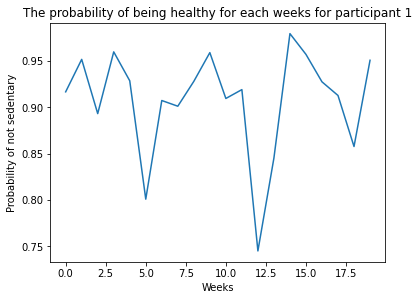

In [41]:
y01 = Acc_table01['Probability of not sedentary']
x01 = [  ]
for n in range(0,len(Acc_table01)):
  x01.append(n)
  n+=1
plt.plot(x01,y01)
plt.xlabel("Weeks")
plt.ylabel("Probability of not sedentary")
plt.title("The probability of being healthy for each weeks for participant 1")
plt.subplots_adjust(bottom=0.05)

Through this graph, the probability of health increas during when time goes by. At the most of time, the participant is healthy. We can see the probability of health keeps around 90%. However, some weeks has lower probability of healthy. That was on the margin of sedentary. The participant should take care about the health during that weeks and weeks with similar condition in future as well.